# Exciton Model for vdWHs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ase.units
from default_parameters import get_thickness

Hartree = ase.units.Hartree
Bohr = ase.units.Bohr

In [2]:
%matplotlib inline

In [3]:
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20

In [8]:
materials = ['WS2','MoS2','WSe2','MoSe2']
nFilling = 3
nPadding = 0
vdWH_data = np.load('vdWHs_nFilling={}_nPadding={}.npz'.format(nFilling, nPadding))

In [9]:
E_b_heat_mat = vdWH_data['E_b_heat_mat']
E_b_heat_xlabels = vdWH_data['E_b_heat_xlabels']
E_b_heat_ylabels = vdWH_data['E_b_heat_ylabels']

In [10]:
def heatmap(data, xlabels, ylabels, cbarlabel, **kwargs):
    # if not ax:
    #     ax = plt.gca()
    
    plt.imshow(data, **kwargs)
    plt.xticks(np.arange(len(xlabels)), labels=xlabels)
    plt.yticks(np.arange(len(ylabels)), labels=ylabels)
    plt.colorbar(label=cbarlabel)
    # cbar.ax.set_ylabel(cbarlabel, rotation=0, va="bottom")

    # Loop over data dimensions and create text annotations.
    for i in range(len(ylabels)):
        for j in range(len(xlabels)):
            colors = ['k', 'w']
            color = colors[int(data[i,j] > np.mean(data))]
            plt.text(j, i, data[i, j], ha="center", va="center", color=color)

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 3 inner hBN layers


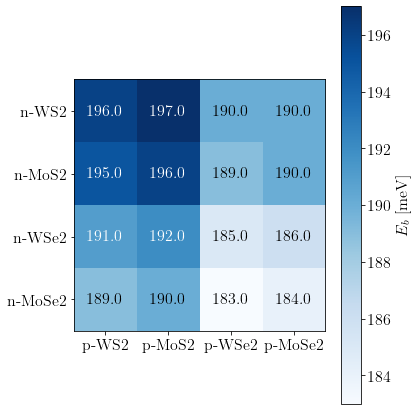

In [11]:
fig = plt.figure(1, figsize=(6,6))

description = 'Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers'.format(nPadding, nFilling)
print(description)
heatmap(np.round(E_b_heat_mat*10**3),
    E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV]',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_E_b.svg')
plt.savefig('./plots/vdWH_E_b.png')
plt.show()

In [13]:
def read_bilayer(bilayer):
    '''@returns V_ee, V_eh, epsM
    '''
    i = list(vdWH_data['bilayer']).index(bilayer)
    V_ee = vdWH_data['V_ee'][i] / Hartree
    V_eh = vdWH_data['V_eh'][i] / Hartree
    V_eh_r = vdWH_data['V_eh_r'][i]
    epsM = vdWH_data['epsM'][i]
    return V_ee, V_eh, V_eh_r, epsM

In [16]:
r = vdWH_data['r']
q = vdWH_data['q']
q_anal = np.linspace(0.0001, q[-1], 300)
eps_const = 2
V_ee_2D_coulomb = (2*np.pi/eps_const) * 1/np.abs(q_anal)

d_BN = get_thickness('BN')
d_barrier = nFilling*d_BN
V_eh_2D_coulomb = -V_ee_2D_coulomb*np.exp(-d_barrier*q_anal)

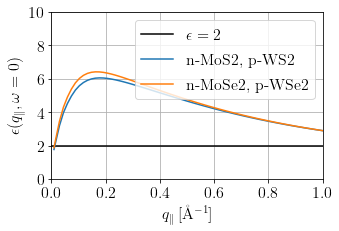

In [17]:
q_i_start = 2
plt.figure(2, figsize=(5,3.5))
plt.plot(np.linspace(0,1, 200), eps_const*np.ones(200),'k-', label=r'$\epsilon = 2$')
for bilayer in ['n-MoS2, p-WS2', 'n-MoSe2, p-WSe2']:
    _, _, _, epsM = read_bilayer(bilayer)
    plt.plot(q[q_i_start:], epsM[q_i_start:].real, label=bilayer)
plt.xlim(0,1)
plt.ylim(0,10)
plt.xlabel(r'$q_\parallel \, [\mathrm{\AA^{-1}}$]')
plt.ylabel(r'$\epsilon(q_\parallel, \omega=0)$')
plt.legend()
# plt.title("Screened potential for all materials")
plt.grid()
plt.tight_layout()
plt.savefig('./plots/vdWH_dielectric_func.svg')
plt.savefig('./plots/vdWH_dielectric_func.png')
plt.show()

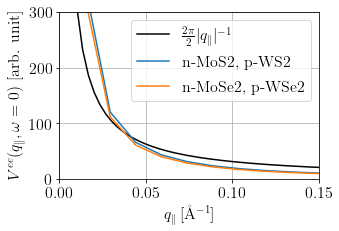

In [18]:
q_i_start = 2
plt.figure(2, figsize=(5,3.5))
plt.plot(q_anal, V_ee_2D_coulomb,'k-', label=r'$\frac{ 2\pi}{ 2 } |q_\parallel|^{-1}$')
for bilayer in ['n-MoS2, p-WS2', 'n-MoSe2, p-WSe2']:
    V_ee, _, _, _ = read_bilayer(bilayer)
    plt.plot(q[q_i_start:], V_ee[q_i_start:].real, label=bilayer)
plt.xlim(0,0.15)
plt.ylim(0,300)
plt.xlabel(r'$q_\parallel \, [\mathrm{\AA^{-1}}$]')
plt.ylabel(r'$V^{ee}(q_\parallel, \omega=0)$ [arb. unit]')
plt.legend()
# plt.title("Screened potential for all materials")
plt.grid()
plt.tight_layout()
plt.savefig('./plots/vdWH_V_ee.svg')
plt.savefig('./plots/vdWH_V_ee.png')
plt.show()

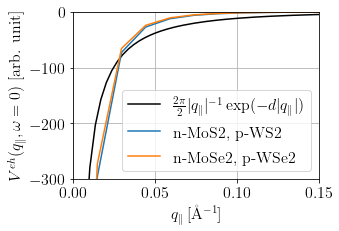

In [19]:
q_i_start = 2
plt.figure(2, figsize=(5,3.5))
plt.plot(q_anal, V_eh_2D_coulomb,'k-', label=r'$\frac{ 2\pi }{ 2 } |q_\parallel|^{-1} \exp(-d |q_\parallel|) $')
for bilayer in ['n-MoS2, p-WS2', 'n-MoSe2, p-WSe2']:
    _, V_eh, _, _ = read_bilayer(bilayer)
    plt.plot(q[q_i_start:], V_eh[q_i_start:].real, label=bilayer)
plt.xlim(0,0.15)
plt.ylim(-300,0)
plt.xlabel(r'$q_\parallel \, [\mathrm{\AA^{-1}}$]')
plt.ylabel(r'$V^{eh}(q_\parallel, \omega=0)$ [arb. unit]')
plt.legend()
# plt.title("Screened potential for all materials")
plt.grid()
plt.tight_layout()
plt.savefig('./plots/vdWH_V_eh.svg')
plt.savefig('./plots/vdWH_V_eh.png')
plt.show()

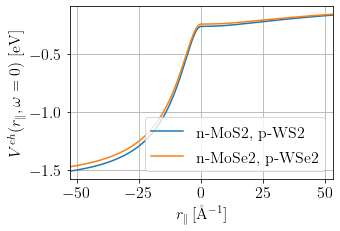

In [23]:
plt.figure(2, figsize=(5,3.5))
# plt.plot(q_anal, V_eh_2D_coulomb,'k-', label=r'$\frac{ 2\pi }{ 2 } |q_\parallel|^{-1} \exp(-d |q_\parallel|) $')
for bilayer in ['n-MoS2, p-WS2', 'n-MoSe2, p-WSe2']:
    _, _, V_eh_r, _ = read_bilayer(bilayer)
    plt.plot(r, V_eh_r, label=bilayer)
plt.xlim(-100*Bohr,100*Bohr)
# plt.ylim(-300,0)
plt.xlabel(r'$r_\parallel \, [\mathrm{\AA^{-1}}$]')
plt.ylabel(r'$V^{eh}(r_\parallel, \omega=0)$ [eV]')
plt.legend()
# plt.title("Screened potential for all materials")
plt.grid()
plt.tight_layout()
plt.savefig('./plots/vdWH_V_eh_r.svg')
plt.savefig('./plots/vdWH_V_eh_r.png')
plt.show()

In [ ]:
# for bilayer in ['n-MoS2, p-WS2', 'n-MoSe2, p-WSe2']:
#     for nPadding in range(4):
#         vdWH_data = np.load('vdWHs_nPadding={}.npz'.format(nPadding))
#         V_ee, V_eh, dielectric_func = read_bilayer(bilayer)
        

In [80]:
i = list(vdWH_data['bilayer']).index(bilayer)

In [81]:
bilayers = list(vdWH_data['bilayer'])
i = bilayers.index(bilayer)
n_materials = int(np.sqrt(len(bilayers)))
i // n_materials, i % n_materials

(3, 2)